In [41]:
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP
from sko.GA import GA_TSP
import time
from math import radians, cos, sin, asin, sqrt

In [47]:
num_points = 10
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
print(points_coordinate)
print(distance_matrix)

[[0.53853053 0.42299897]
 [0.77353083 0.84005415]
 [0.95730342 0.01225946]
 [0.55020771 0.61981159]
 [0.57309622 0.35782342]
 [0.36916397 0.3362782 ]
 [0.85807908 0.33537698]
 [0.61188014 0.21552919]
 [0.71693004 0.96232136]
 [0.36681128 0.41729883]]
[[0.         0.47870677 0.58658135 0.19715873 0.07377424 0.19027748
  0.33134407 0.22005425 0.56806252 0.17181383]
 [0.47870677 0.         0.84794835 0.31365587 0.52222649 0.64598975
  0.51171032 0.64510647 0.13473278 0.5866369 ]
 [0.58658135 0.84794835 0.         0.73133201 0.51674909 0.67148801
  0.33800946 0.40079399 0.97999846 0.71605717]
 [0.19715873 0.31365587 0.73133201 0.         0.2629861  0.33640454
  0.41915133 0.40895935 0.38093212 0.27321359]
 [0.07377424 0.52222649 0.51674909 0.2629861  0.         0.2050672
  0.28586549 0.14748505 0.62137423 0.21468768]
 [0.19027748 0.64598975 0.67148801 0.33640454 0.2050672  0.
  0.48891594 0.27109309 0.71615031 0.08105478]
 [0.33134407 0.51171032 0.33800946 0.41915133 0.28586549 0.48891594


In [56]:
#num_points = 51
# data = {'lat': [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538],
#         'long': [-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]}

num_points = 10
data = {'lat': [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800],
        'long': [-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400]}


df = pd.DataFrame(data)

distance_matrix = pd.DataFrame(index=df.index, columns=df.index)

arr_test = []
dist_arr = []

for i in range(len(df)):
    for j in range(len(df)):
        distance_matrix.iloc[i,j] = distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j])
        arr_test.append(distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j]))
    dist_arr.append(arr_test.copy())
    arr_test =[]

print(dist_arr)

distance_matrix = dist_arr

print(distance_matrix)
#num_points = len(data['lat'])

[[0.0, 0.1774845009106951, 0.27278509544127527, 0.2142518892338437, 0.12367755874276706, 0.19674164726372098, 0.17517781886527295, 0.09625926718974624, 0.18042441792251668, 0.28712983622214494], [0.1774845009106951, 0.0, 0.10931033075789744, 0.12230234488885565, 0.14619855175160934, 0.1307166500981445, 0.11542840410643801, 0.20597834603135223, 0.3308275784632599, 0.4367860103621325], [0.27278509544127527, 0.10931033075789744, 0.0, 0.10519193171710664, 0.19622674491482114, 0.13062303096786695, 0.1339580362056657, 0.2710819725716895, 0.4375355250817853, 0.5443454899377181], [0.2142518892338437, 0.12230234488885565, 0.10519193171710664, 0.0, 0.10648699815007251, 0.026826090401558325, 0.04072818058825282, 0.18248247240441373, 0.39316757550596415, 0.5006480236326879], [0.12367755874276706, 0.14619855175160934, 0.19622674491482114, 0.10648699815007251, 0.0, 0.08253312245827343, 0.0664636053834987, 0.07644148146707083, 0.3030405682554088, 0.4083971326373165], [0.19674164726372098, 0.130716650

In [57]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [58]:
# Calculates distance between two coordinates
def distance(lat1, long1, lat2, long2):
     
    # Converts decimal degrees to radians
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    # Radius of earth in miles
    r = 3956
      
    # Haversine formula
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
 
    dist = 2 * r * asin(sqrt(h))

    return dist
    
# test code
# lat1 = 53.32055555555556
# lat2 = 53.31861111111111
# long1 = -1.7297222222222221
# long2 =  -1.6997222222222223
# print(distance(lat1, lat2, long1, long2), "miles")

In [59]:
# aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
#                   size_pop=num_points, max_iter=10,
#                   distance_matrix=distance_matrix)

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=num_points, max_iter=10,
                  distance_matrix=distance_matrix)

best_x, best_y = aca.run()


#Plot the result
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
for index in range(0, len(best_points_)):
    ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()

TypeError: list indices must be integers or slices, not tuple

## How differently does ACO perform run to run?

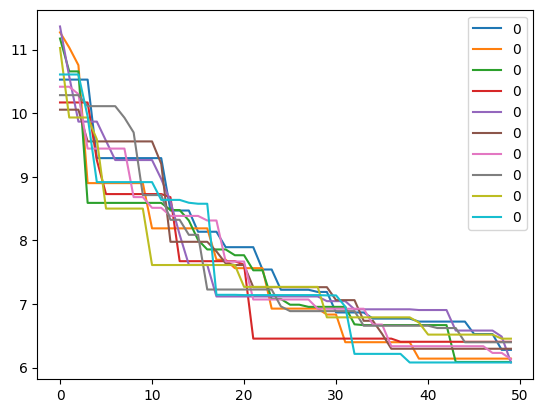

In [11]:
fig, ax = plt.subplots(1, 1)
for i in range(10):

    aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=10, max_iter=50,
                  distance_matrix=distance_matrix)

    best_x, best_y = aca.run()
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax)
    


## How does ACO compare to GA on TSP?

In [12]:
num_points = 50
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

aca_start = time.time()
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=num_points, max_iter=100,
                  distance_matrix=distance_matrix)

best_x, best_y = aca.run()
aca_stop = time.time()
print("ACO Distance:", best_y)
print("Time elapsed:", aca_stop-aca_start)

ga_start = time.time()
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)

best_points, best_distance = ga_tsp.run()
ga_stop = time.time()
print("GA Distance: ", best_distance[0])
print("GA Time elapsed:", ga_stop-ga_start)


ACO Distance: 6.073742141078676
Time elapsed: 10.239534854888916
GA Distance:  6.690018274332892
GA Time elapsed: 2.633413076400757
